# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [9]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:\\Users\kelly\Documents\Part01'

In [10]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [13]:
sorted(app_train.corr()['TARGET'])

[-0.17891869762805598,
 -0.1604716716054463,
 -0.15531712606409276,
 -0.07823930831003195,
 -0.04598707841544573,
 -0.044003370532464434,
 -0.043767921047647734,
 -0.04322626321389568,
 -0.039645281169414404,
 -0.03722714854256482,
 -0.034198793675268006,
 -0.033862876768524695,
 -0.03361350325191881,
 -0.03339428719114784,
 -0.03299711746766171,
 -0.03273928440786577,
 -0.03269782531055346,
 -0.032595546758925106,
 -0.03213117100504484,
 -0.030895908161216207,
 -0.030684615765690034,
 -0.03036928646150375,
 -0.02949756463337797,
 -0.02918375887666593,
 -0.028601893973031315,
 -0.027283870667726976,
 -0.02503053329108065,
 -0.024620663606522288,
 -0.02416583143016718,
 -0.023806272330580556,
 -0.023393245570216617,
 -0.022745743190108993,
 -0.022325926477460307,
 -0.022149284063369194,
 -0.02208126137315907,
 -0.022068203834843144,
 -0.021850938463875168,
 -0.019952283924281496,
 -0.019172182012742896,
 -0.019024756327401547,
 -0.018572868907697104,
 -0.018549661629742864,
 -0.01738742

In [15]:
type(sorted(app_train.corr()['TARGET']))

list

In [17]:
sorted(app_train.corr()['TARGET'])[0:14]

[-0.17891869762805598,
 -0.1604716716054463,
 -0.15531712606409276,
 -0.07823930831003195,
 -0.04598707841544573,
 -0.044003370532464434,
 -0.043767921047647734,
 -0.04322626321389568,
 -0.039645281169414404,
 -0.03722714854256482,
 -0.034198793675268006,
 -0.033862876768524695,
 -0.03361350325191881,
 -0.03339428719114784]

In [26]:
sorted(app_train.corr()['TARGET'])[-16:-1]

[0.028524322363399968,
 0.03127647212660722,
 0.03224757925295741,
 0.03251834110161418,
 0.03761156427512843,
 0.04197486283152581,
 0.044346346851488506,
 0.04439537480589986,
 0.04598221971656028,
 0.050994464367959576,
 0.05145717260719229,
 0.0552184835135491,
 0.058899014945840766,
 0.060892667564898695,
 0.07495845742555217]

TypeError: 'Index' object is not callable

In [28]:
type(app_train.corr()['TARGET'])

pandas.core.series.Series

In [31]:
app_train.corr()['TARGET'].index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=110)

In [34]:
app_train.corr()['TARGET'].values

array([-2.10846902e-03,  1.00000000e+00, -3.08959082e-02, -2.18509385e-02,
       -6.14838770e-03,  1.91871336e-02, -3.98186560e-03, -3.03692865e-02,
       -1.28165615e-02, -3.96452812e-02, -3.72271485e-02, -7.82393083e-02,
        7.49584574e-02,  4.19748628e-02,  5.14571726e-02,  3.76115643e-02,
        5.34395579e-04,  4.59822197e-02,  2.85243224e-02,  3.70126802e-04,
       -2.38062723e-02, -1.75838343e-03,  9.30778440e-03,  5.88990149e-02,
        6.08926676e-02, -2.41658314e-02,  5.57594452e-03,  6.94190755e-03,
        2.81947918e-03,  4.43953748e-02,  5.09944644e-02,  3.25183411e-02,
       -1.55317126e-01, -1.60471672e-01, -1.78918698e-01, -2.94975646e-02,
       -2.27457432e-02, -9.72767327e-03, -2.21492841e-02, -1.85496616e-02,
       -3.41987937e-02, -1.91721820e-02, -4.40033705e-02, -3.36135033e-02,
       -1.08848227e-02, -2.50305333e-02, -3.29971175e-02, -3.17610752e-03,
       -1.35780698e-02, -2.72838707e-02, -1.99522839e-02, -9.03644735e-03,
       -2.20682038e-02, -

In [43]:
app_train.corr()['TARGET'].sort_values()

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED_ANOM            -0.045987
FLOORSMAX_AVG                 -0.044003
FLOORSMAX_MEDI                -0.043768
FLOORSMAX_MODE                -0.043226
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
ELEVATORS_AVG                 -0.034199
ELEVATORS_MEDI                -0.033863
FLOORSMIN_AVG                 -0.033614
FLOORSMIN_MEDI                -0.033394
LIVINGAREA_AVG                -0.032997
LIVINGAREA_MEDI               -0.032739
FLOORSMIN_MODE                -0.032698
TOTALAREA_MODE                -0.032596
ELEVATORS_MODE                -0.032131
NAME_CONTRACT_TYPE            -0.030896
LIVINGAREA_MODE               -0.030685
AMT_CREDIT                    -0.030369
APARTMENTS_AVG                -0.029498
APARTMENTS_MEDI               -0.029184
FLAG_DOCUMENT_6               -0.028602


In [47]:
app_train.corr()['TARGET'].sort_values()[0:15]

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [48]:
app_train.corr()['TARGET'].sort_values()[-16:-1]

FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
Name: TARGET, dtype: float64

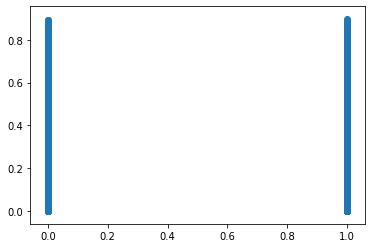

In [50]:
plt.scatter(app_train['TARGET'],app_train['EXT_SOURCE_3'])

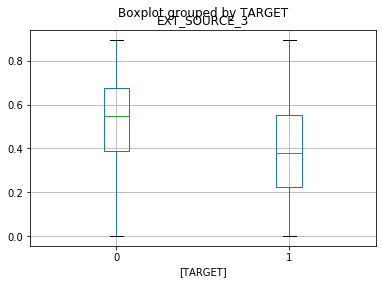

In [54]:
app_train.boxplot(column='EXT_SOURCE_3',by=['TARGET'])

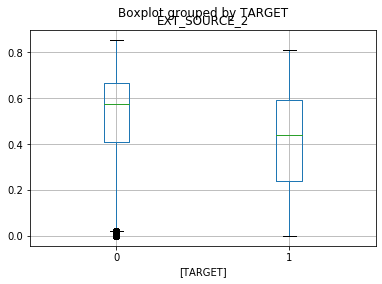

In [55]:
app_train.boxplot(column='EXT_SOURCE_2',by=['TARGET'])

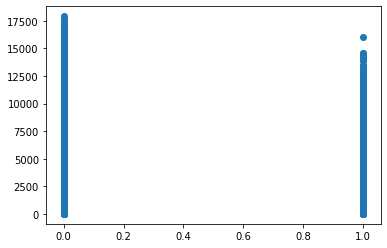

In [57]:
plt.scatter(app_train['TARGET'],-app_train['DAYS_EMPLOYED'])

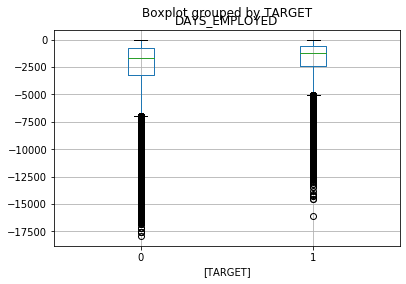

In [59]:
app_train.boxplot(column='DAYS_EMPLOYED',by=['TARGET'])

In [60]:
app_train['DAYS_EMPLOYED']

0         -637.0
1        -1188.0
2         -225.0
3        -3039.0
4        -3038.0
5        -1588.0
6        -3130.0
7         -449.0
8            NaN
9        -2019.0
10        -679.0
11           NaN
12       -2717.0
13       -3028.0
14        -203.0
15       -1157.0
16       -1317.0
17        -191.0
18       -7804.0
19       -2038.0
20       -4286.0
21       -1652.0
22       -4306.0
23           NaN
24        -746.0
25       -3494.0
26       -2628.0
27       -1234.0
28       -1796.0
29       -1010.0
           ...  
307481   -3147.0
307482    -226.0
307483       NaN
307484    -328.0
307485    -670.0
307486   -1185.0
307487       NaN
307488   -1218.0
307489    -286.0
307490   -1928.0
307491   -1953.0
307492   -1618.0
307493   -2306.0
307494   -6573.0
307495   -7438.0
307496   -2178.0
307497   -1222.0
307498   -3689.0
307499   -8694.0
307500   -5326.0
307501   -1046.0
307502   -8736.0
307503    -399.0
307504   -7258.0
307505       NaN
307506    -236.0
307507       NaN
307508   -7921

In [61]:
sub_df = app_train[app_train['DAYS_EMPLOYED'] != 365243]

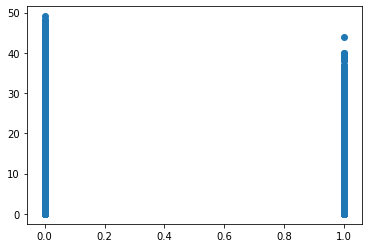

In [63]:
plt.scatter(sub_df['TARGET'],sub_df['DAYS_EMPLOYED']/(-365))

In [67]:
plt.boxplot(sub_df['DAYS_EMPLOYED']/(-365),by=['TARGET'])

TypeError: boxplot() got an unexpected keyword argument 'by'

In [76]:
sub_df['DAYS_EMPLOYED']=sub_df['DAYS_EMPLOYED']/(-365)

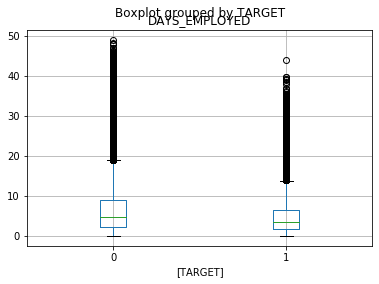

In [78]:
sub_df.boxplot(column='DAYS_EMPLOYED',by=['TARGET'])